In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/user_reviews.csv")

In [4]:
df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [6]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [9]:
df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


In [11]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [12]:
d={"Positive":2,"Neutral":1,"Negative":0}
df["Sentiment"]=df["Sentiment"].map(d)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  int64  
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
df=df.drop("App",axis=1)

In [17]:
df["Translated_Review"].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis',
       'Works great especially going grocery store', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [18]:
df["Translated_Review"]=df["Translated_Review"].str.lower()
df["Translated_Review"]=df["Translated_Review"].str.replace('[^\w\s]','')
df["Translated_Review"]=df["Translated_Review"].str.replace('\d+','')
df["Translated_Review"]=df["Translated_Review"].str.replace('\n',' ').replace('\r',' ')

In [19]:
x=df.Translated_Review
y=df.Sentiment

In [20]:
vect=CountVectorizer(lowercase=True,stop_words='english')
x_yeni=vect.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [22]:
print(x_yeni)

  (0, 11601)	1
  (0, 6278)	1
  (0, 5183)	1
  (0, 7764)	2
  (0, 20022)	1
  (0, 9934)	1
  (0, 4369)	1
  (0, 3171)	1
  (0, 2110)	2
  (0, 7772)	1
  (0, 9357)	1
  (0, 11899)	1
  (0, 17926)	1
  (0, 11566)	1
  (1, 9339)	1
  (1, 6283)	1
  (1, 9276)	1
  (1, 6934)	1
  (1, 16493)	1
  (1, 1881)	1
  (2, 22514)	1
  (2, 8820)	1
  (2, 6728)	1
  (2, 8595)	1
  (2, 8884)	1
  :	:
  (37424, 16655)	1
  (37425, 13259)	1
  (37425, 8709)	1
  (37425, 8994)	2
  (37425, 1833)	1
  (37425, 9151)	1
  (37425, 2865)	1
  (37425, 18418)	1
  (37425, 16050)	1
  (37425, 11657)	1
  (37425, 14671)	1
  (37425, 3448)	1
  (37425, 15710)	1
  (37426, 1011)	1
  (37426, 11169)	1
  (37426, 13655)	1
  (37426, 21484)	1
  (37426, 225)	1
  (37426, 20986)	1
  (37426, 17631)	1
  (37426, 15284)	1
  (37426, 9791)	1
  (37426, 7621)	2
  (37426, 11188)	1
  (37426, 16142)	1


In [23]:
mb=MultinomialNB()

In [24]:
mb.fit(x_train,y_train)

MultinomialNB()

In [25]:
tahmin=mb.predict(x_test)

In [26]:
accuracy_score(y_test,tahmin)

0.7779202735919633

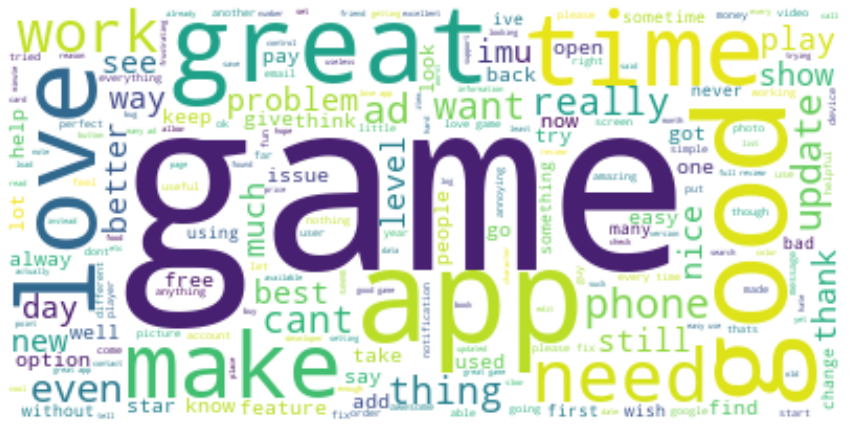

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.Translated_Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()